In [10]:
import pandas as pd

file_save_CMU_POHMM = './TypeNet34-enroll_17-cerrect/TypeNet_finetune_modify/34user_modify_train20211116_TypeNet_metric_result_200.csv'

data_frame_CMU_POHMM = pd.read_csv(file_save_CMU_POHMM)
data_frame_CMU_POHMM = data_frame_CMU_POHMM.drop(['Unnamed: 0'], axis=1)
data_frame_CMU_POHMM.head()

,user,genuine,score,imostor_user
0,s040,0,1.182641,s040
1,s040,0,1.088622,s040
2,s040,0,1.605141,s040
3,s040,0,1.186862,s040
4,s040,0,0.963052,s040


In [11]:
user_list = data_frame_CMU_POHMM['user'].unique().tolist()
user_list = sorted(user_list)
user_list

['s040',
 's041',
 's042',
 's043',
 's044',
 's046',
 's047',
 's048',
 's049',
 's050',
 's051',
 's052',
 's053',
 's054',
 's055',
 's056',
 's057']

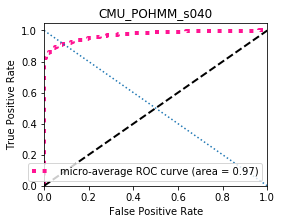

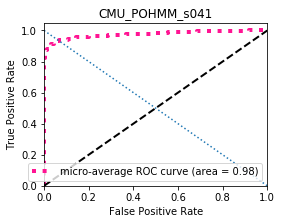

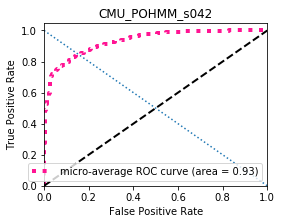

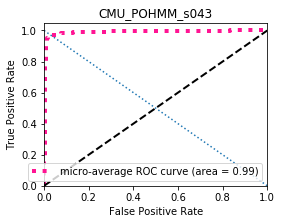

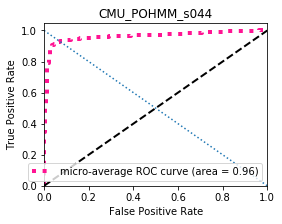

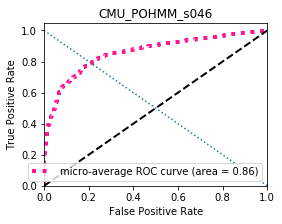

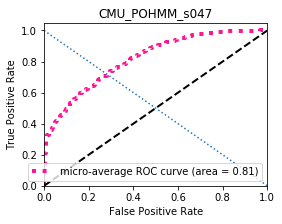

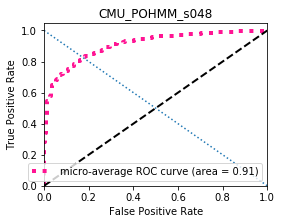

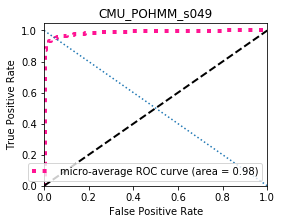

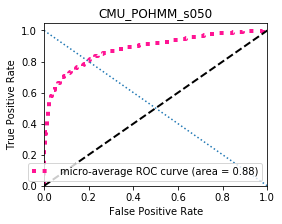

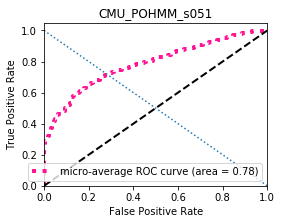

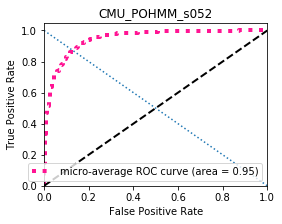

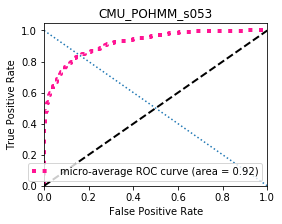

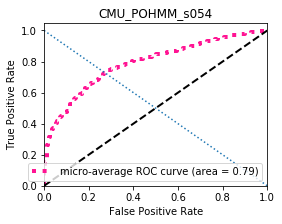

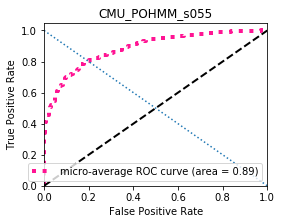

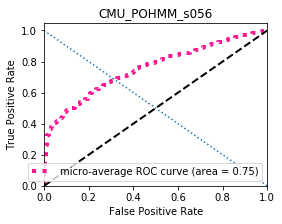

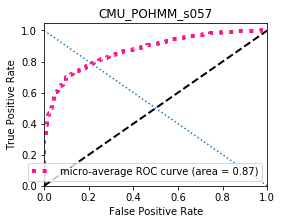

In [12]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2

for _,u in enumerate(user_list):
    X = data_frame_CMU_POHMM[data_frame_CMU_POHMM['user']==u]['score']
    y = data_frame_CMU_POHMM[data_frame_CMU_POHMM['user']==u]['genuine']
    Y = [x + 0 for x in y]
    
    y_test = label_binarize(Y, classes=[i for i in range(n_classes)])
    
    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, X)
    roc_auc = auc(fpr, tpr)

    # Compute micro-average ROC curve and ROC area（方法二）
    #fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), X.ravel())
    #roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area（方法一）
    # First aggregate all false positive rates
    #all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    #mean_tpr = np.zeros_like(all_fpr)
    #for i in range(n_classes):
    #    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    #mean_tpr /= n_classes
    #fpr["macro"] = all_fpr
    #tpr["macro"] = mean_tpr
    #roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure(figsize=(4,3))
    plt.plot(fpr, tpr,
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc),
             color='deeppink', linestyle=':', linewidth=4)
    '''
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    '''
    '''
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'black', 'green', 'brown', 'purple', 'red', 'darkcyan', 'crimson'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    '''

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.plot([0, 1], [1, 0], ':')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CMU_POHMM_'+u)
    plt.legend(loc="lower right")
    plt.show()
    

In [22]:
import pandas as pd

file_save_CMU_POHMM = './POHMM_result20211029/5users_10vs400_train_verification_results_out_sess2-8.csv'

data_frame_CMU_POHMM = pd.read_csv(file_save_CMU_POHMM)
data_frame_CMU_POHMM.head()

,user,genuine,score
0,s002,True,-101.542050
1,s002,True,-95.671920
2,s002,True,-96.113428
3,s002,True,-91.769888
4,s002,True,-89.166169


In [2]:
user_list = data_frame_CMU_POHMM['user'].unique().tolist()
user_list

['s002', 's032', 's047', 's036', 's052']

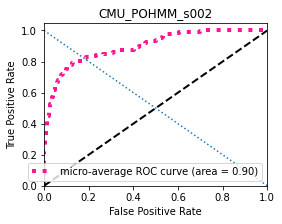

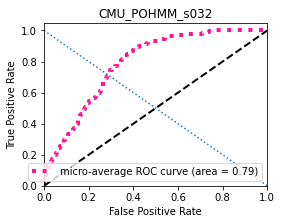

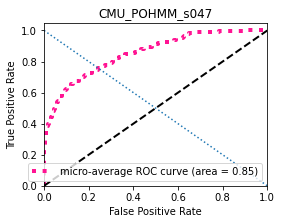

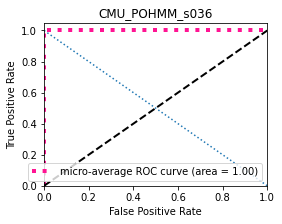

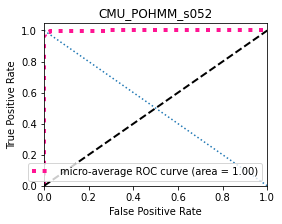

In [3]:
# 引入必要的库
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2

for _,u in enumerate(user_list):
    X = data_frame_CMU_POHMM[data_frame_CMU_POHMM['user']==u]['score']
    y = data_frame_CMU_POHMM[data_frame_CMU_POHMM['user']==u]['genuine']
    Y = [x + 0 for x in y]
    
    y_test = label_binarize(Y, classes=[i for i in range(n_classes)])
    
    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, X)
    roc_auc = auc(fpr, tpr)

    # Compute micro-average ROC curve and ROC area（方法二）
    #fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), X.ravel())
    #roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area（方法一）
    # First aggregate all false positive rates
    #all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    #mean_tpr = np.zeros_like(all_fpr)
    #for i in range(n_classes):
    #    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    #mean_tpr /= n_classes
    #fpr["macro"] = all_fpr
    #tpr["macro"] = mean_tpr
    #roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure(figsize=(4,3))
    plt.plot(fpr, tpr,
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc),
             color='deeppink', linestyle=':', linewidth=4)
    '''
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    '''
    '''
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'black', 'green', 'brown', 'purple', 'red', 'darkcyan', 'crimson'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    '''

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.plot([0, 1], [1, 0], ':')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CMU_POHMM_'+u)
    plt.legend(loc="lower right")
    plt.show()
    